In [1]:
import pandas as pd
import numpy as np
import os


In [2]:

DATA_DIR = "/Users/harshit/Downloads/Research-Commons-Quant/okx-midcap-token-index/dataframes"

# Your 5 selected tokens (matching the filenames without '.csv')
selected_tokens = ['AIDOGE_USDT', 'VELO_USDT', 'MERL_USDT', 'BIGTIME_USDT', 'SUSHI_USDT']

def calculate_metrics(df, symbol):
    df = df.copy()
    df['return'] = df['close'].pct_change()
    df.dropna(inplace=True)

    total_return = (df['close'].iloc[-1] / df['close'].iloc[0]) - 1
    volatility = df['return'].std() * np.sqrt(365)
    sharpe = df['return'].mean() / df['return'].std() * np.sqrt(365)

    cumulative = (1 + df['return']).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    max_drawdown = drawdown.min()

    turnover = df['return'].abs().mean()

    return {
        'Token': symbol,
        'Total Return': round(total_return * 100, 2),
        'Annual Volatility': round(volatility * 100, 2),
        'Sharpe Ratio': round(sharpe, 2),
        'Max Drawdown': round(max_drawdown * 100, 2),
        'Turnover': round(turnover * 100, 2),
        'Days': len(df)
    }

metrics = []
for file in os.listdir(DATA_DIR):
    if file.endswith('.csv'):
        symbol = file.replace(".csv", "")
        if symbol in selected_tokens:  # Only analyze these 5 tokens
            path = os.path.join(DATA_DIR, file)
            df = pd.read_csv(path)
            if 'close' in df.columns and len(df) > 100:
                try:
                    result = calculate_metrics(df, symbol)
                    metrics.append(result)
                except Exception as e:
                    print(f"Error with {symbol}: {e}")

summary_df = pd.DataFrame(metrics)
summary_df = summary_df.sort_values(by="Sharpe Ratio", ascending=False).reset_index(drop=True)

summary_df.style.set_properties(**{'text-align': 'center'}).format({
    "Total Return": "{:.2f}%",
    "Annual Volatility": "{:.2f}%",
    "Max Drawdown": "{:.2f}%",
    "Turnover": "{:.2f}%",
})


,Token,Total Return,Annual Volatility,Sharpe Ratio,Max Drawdown,Turnover,Days
0,VELO_USDT,64.24%,129.79%,1.050000,-73.08%,5.19%,364
1,SUSHI_USDT,-3.74%,124.47%,0.600000,-81.66%,4.70%,364
2,AIDOGE_USDT,-54.22%,190.97%,0.530000,-86.06%,5.72%,364
3,BIGTIME_USDT,-44.74%,142.20%,0.290000,-81.02%,5.34%,364
4,MERL_USDT,-57.90%,140.36%,0.100000,-85.13%,5.46%,364


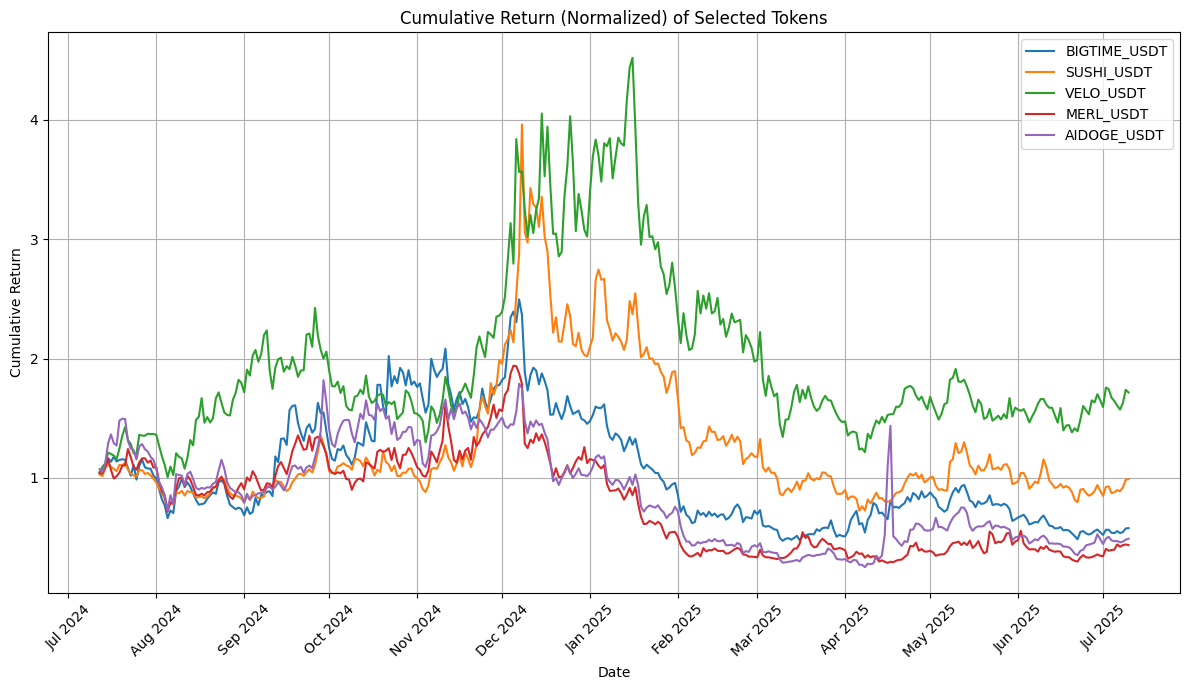

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

DATA_DIR = "/Users/harshit/Downloads/Research-Commons-Quant/okx-midcap-token-index/dataframes"
selected_tokens = ['VELO_USDT', 'SUSHI_USDT', 'AIDOGE_USDT', 'BIGTIME_USDT', 'MERL_USDT']

plt.figure(figsize=(12, 7))

for file in os.listdir(DATA_DIR):
    token = file.replace('.csv', '')
    if file.endswith(".csv") and token in selected_tokens:
        df = pd.read_csv(os.path.join(DATA_DIR, file))
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df['return'] = df['close'].pct_change()
        df['cumulative'] = (1 + df['return']).cumprod()

        plt.plot(df['timestamp'], df['cumulative'], label=token)

plt.title("Cumulative Return (Normalized) of Selected Tokens")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()

# Format x-axis to show months
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())  # every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # e.g. Apr 2025
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()
